<a href="https://colab.research.google.com/github/ptoledoc7/Prueba/blob/main/Practica_2_Pablito_Toledo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card: Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

|VARIABLE|DESCRIPTION|
|--------|-----------|
|CUST_ID|Identificación del titular de la tarjeta de crédito|
|BALANCE|Monto del saldo en la cuenta para realizar compras|
|PURCHASES|Monto de compras realizadas desde la cuenta|
|INSTALLMENTS|Monto de la compra realizada en plazos|
|CASH_ADVANCE|Anticipo en efectivo dado por el cliente|
|CREDIT_LIMIT|Límite de la tarjeta de crédito del cliente|
|PAYMENTS|Importe del pago realizado por el cliente|
|MIN_PAYMENTS|Importe mínimo de los pagos realizados por el cliente|
|TENURE|Tenencia del servicio de tarjeta de crédito para el cliente|

## Load Data

In [87]:
df = pd.read_csv('credit_card.csv')
df.sample(3)

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MIN_PAYMENTS,TENURE
455,C10473,87.442862,786.32,600.00,0.0,7500.0,881.284581,97.186371,11
8108,C18328,121.446047,1254.46,344.00,0.0,1000.0,1244.737859,153.924261,12
620,C10645,1088.031913,9734.63,5978.62,0.0,8500.0,8571.945329,204.762568,12


## Analysis

In [88]:
df.shape

(8950, 9)

In [89]:
df.dtypes

CUST_ID          object
BALANCE         float64
PURCHASES       float64
INSTALLMENTS    float64
CASH_ADVANCE    float64
CREDIT_LIMIT    float64
PAYMENTS        float64
MIN_PAYMENTS    float64
TENURE            int64
dtype: object

In [90]:
df.isnull().sum()

CUST_ID         0
BALANCE         0
PURCHASES       0
INSTALLMENTS    0
CASH_ADVANCE    0
CREDIT_LIMIT    0
PAYMENTS        0
MIN_PAYMENTS    0
TENURE          0
dtype: int64

In [91]:
df.nunique()

CUST_ID         8950
BALANCE         8871
PURCHASES       6203
INSTALLMENTS    4452
CASH_ADVANCE    4323
CREDIT_LIMIT     205
PAYMENTS        8711
MIN_PAYMENTS    8636
TENURE             7
dtype: int64

In [92]:
df.describe()

,BALANCE,PURCHASES,INSTALLMENTS,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MIN_PAYMENTS,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,411.067645,978.871112,4494.282473,1733.143852,844.906767,11.517318
std,2081.531879,2136.634782,904.338115,2097.163877,3638.646702,2895.063757,2332.792322,1.338331
min,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,6.000000
25%,128.281915,39.635000,0.000000,0.000000,1600.000000,383.276166,170.857654,12.000000
50%,873.385231,361.280000,89.000000,0.000000,3000.000000,856.901546,312.343947,12.000000
75%,2054.140036,1110.130000,468.637500,1113.821139,6500.000000,1901.134317,788.713501,12.000000
max,19043.138560,49039.570000,22500.000000,47137.211760,30000.000000,50721.483360,76406.207520,12.000000


### Cust_ID

In [93]:
num_uni = df['CUST_ID'].nunique()
per_uni = num_uni / df.shape[0] * 100

print(f'Unique Values: {per_uni:.2f}%')

Unique Values: 100.00%


### Balance

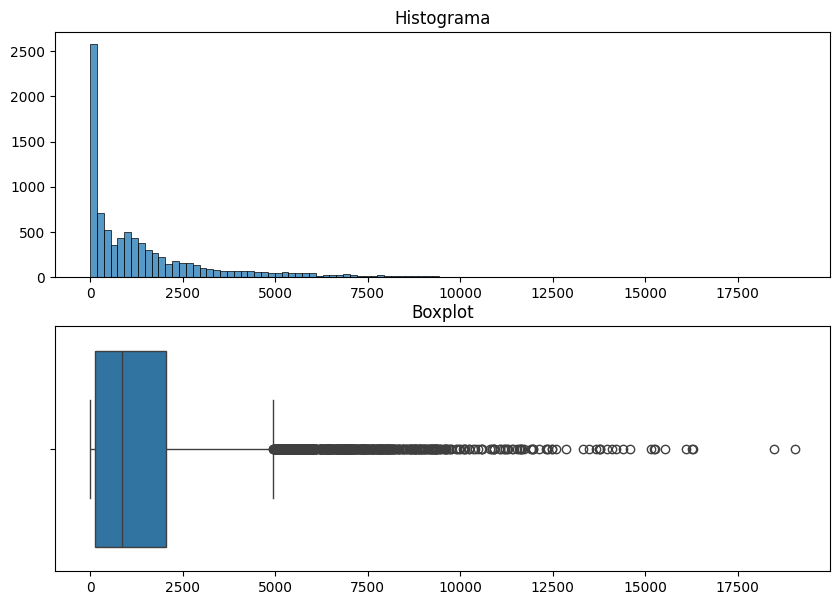

In [94]:
plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
plt.title('Histograma')
sns.histplot(data=df, x='BALANCE')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

plt.subplot(2,1,2)
plt.title('Boxplot')
sns.boxplot(data=df, x='BALANCE')
plt.gca().set_xlabel('')

plt.show()

In [95]:
print(f'BALANCE \n')

print(f'Media: {df.BALANCE.mean():.2f}')
print(f'Mediana: {df.BALANCE.median():.2f}')
print(f'Moda: {df.BALANCE.mode()[0]:.2f}\n')

print(f'Desviacion: {df.BALANCE.std():.2f}')
print(f'Minimo: {df.BALANCE.min():.2f}')
print(f'Maximo: {df.BALANCE.max():.2f}')
print(f'Rango: {df.BALANCE.max() - df.BALANCE.min():.2f}')

BALANCE 

Media: 1564.47
Mediana: 873.39
Moda: 0.00

Desviacion: 2081.53
Minimo: 0.00
Maximo: 19043.14
Rango: 19043.14


### Purchases

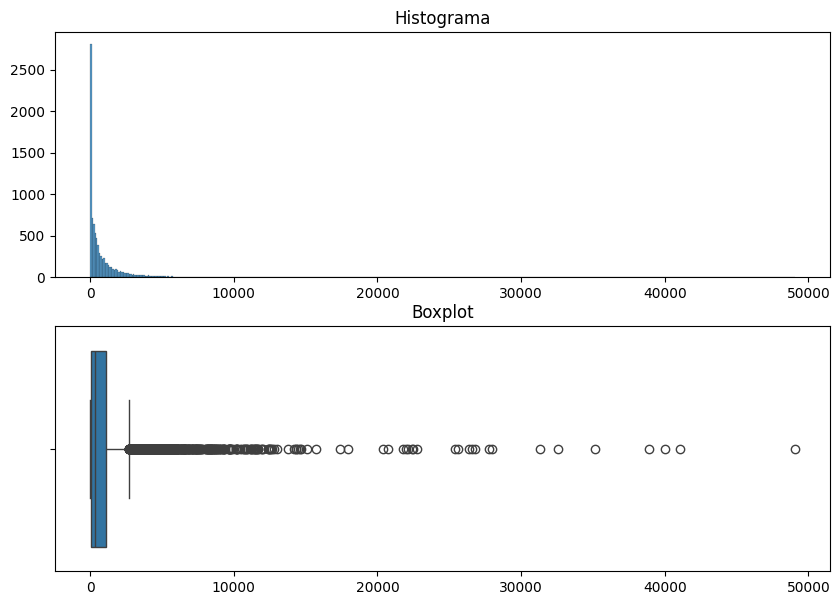

In [96]:
plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
plt.title('Histograma')
sns.histplot(data=df, x='PURCHASES')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

plt.subplot(2,1,2)
plt.title('Boxplot')
sns.boxplot(data=df, x='PURCHASES')
plt.gca().set_xlabel('')

plt.show()

In [97]:
print(f'PURCHASES \n')

print(f'Media: {df.PURCHASES.mean():.2f}')
print(f'Mediana: {df.PURCHASES.median():.2f}')
print(f'Moda: {df.PURCHASES.mode()[0]:.2f}\n')

print(f'Desviacion: {df.PURCHASES.std():.2f}')
print(f'Minimo: {df.PURCHASES.min():.2f}')
print(f'Maximo: {df.PURCHASES.max():.2f}')
print(f'Rango: {df.PURCHASES.max() - df.PURCHASES.min():.2f}')

PURCHASES 

Media: 1003.20
Mediana: 361.28
Moda: 0.00

Desviacion: 2136.63
Minimo: 0.00
Maximo: 49039.57
Rango: 49039.57


### Installments

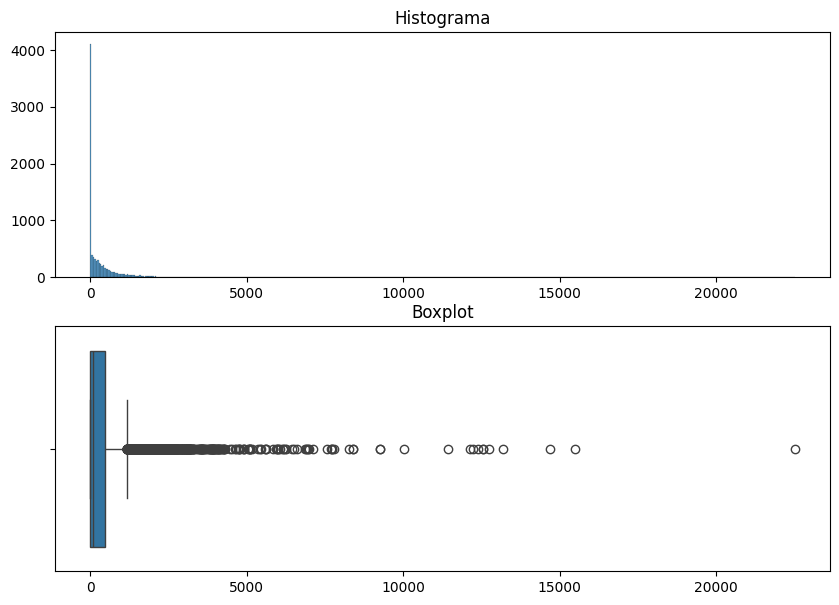

In [98]:
plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
plt.title('Histograma')
sns.histplot(data=df, x='INSTALLMENTS')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

plt.subplot(2,1,2)
plt.title('Boxplot')
sns.boxplot(data=df, x='INSTALLMENTS')
plt.gca().set_xlabel('')

plt.show()

In [99]:
print(f'INSTALLMENTS \n')

print(f'Media: {df.INSTALLMENTS.mean():.2f}')
print(f'Mediana: {df.INSTALLMENTS.median():.2f}')
print(f'Moda: {df.INSTALLMENTS.mode()[0]:.2f}\n')

print(f'Desviacion: {df.INSTALLMENTS.std():.2f}')
print(f'Minimo: {df.INSTALLMENTS.min():.2f}')
print(f'Maximo: {df.INSTALLMENTS.max():.2f}')
print(f'Rango: {df.INSTALLMENTS.max() - df.INSTALLMENTS.min():.2f}')

INSTALLMENTS 

Media: 411.07
Mediana: 89.00
Moda: 0.00

Desviacion: 904.34
Minimo: 0.00
Maximo: 22500.00
Rango: 22500.00


### Cash Advance

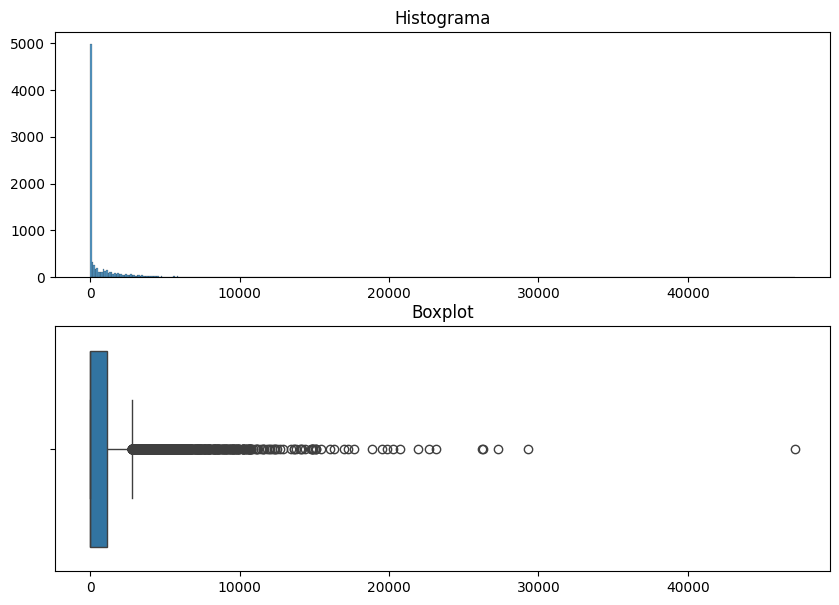

In [100]:
plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
plt.title('Histograma')
sns.histplot(data=df, x='CASH_ADVANCE')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

plt.subplot(2,1,2)
plt.title('Boxplot')
sns.boxplot(data=df, x='CASH_ADVANCE')
plt.gca().set_xlabel('')

plt.show()

In [101]:
print(f'CASH_ADVANCE \n')

print(f'Media: {df.CASH_ADVANCE.mean():.2f}')
print(f'Mediana: {df.CASH_ADVANCE.median():.2f}')
print(f'Moda: {df.CASH_ADVANCE.mode()[0]:.2f}\n')

print(f'Desviacion: {df.CASH_ADVANCE.std():.2f}')
print(f'Minimo: {df.CASH_ADVANCE.min():.2f}')
print(f'Maximo: {df.CASH_ADVANCE.max():.2f}')
print(f'Rango: {df.CASH_ADVANCE.max() - df.CASH_ADVANCE.min():.2f}')

CASH_ADVANCE 

Media: 978.87
Mediana: 0.00
Moda: 0.00

Desviacion: 2097.16
Minimo: 0.00
Maximo: 47137.21
Rango: 47137.21


### Credit Limit

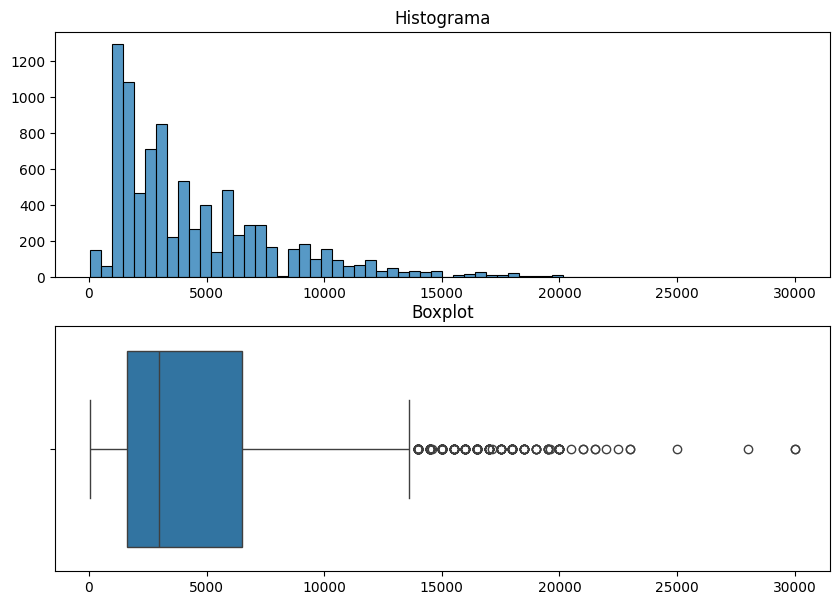

In [102]:
plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
plt.title('Histograma')
sns.histplot(data=df, x='CREDIT_LIMIT')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

plt.subplot(2,1,2)
plt.title('Boxplot')
sns.boxplot(data=df, x='CREDIT_LIMIT')
plt.gca().set_xlabel('')

plt.show()

In [103]:
print(f'CREDIT_LIMIT \n')

print(f'Media: {df.CREDIT_LIMIT.mean():.2f}')
print(f'Mediana: {df.CREDIT_LIMIT.median():.2f}')
print(f'Moda: {df.CREDIT_LIMIT.mode()[0]:.2f}\n')

print(f'Desviacion: {df.CREDIT_LIMIT.std():.2f}')
print(f'Minimo: {df.CREDIT_LIMIT.min():.2f}')
print(f'Maximo: {df.CREDIT_LIMIT.max():.2f}')
print(f'Rango: {df.CREDIT_LIMIT.max() - df.CREDIT_LIMIT.min():.2f}')

CREDIT_LIMIT 

Media: 4494.28
Mediana: 3000.00
Moda: 3000.00

Desviacion: 3638.65
Minimo: 50.00
Maximo: 30000.00
Rango: 29950.00


### Payments

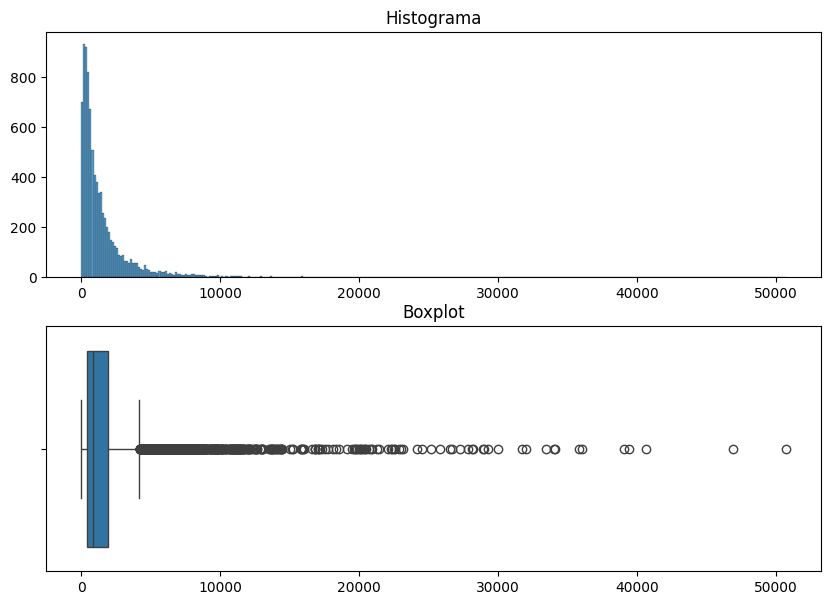

In [104]:
plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
plt.title('Histograma')
sns.histplot(data=df, x='PAYMENTS')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

plt.subplot(2,1,2)
plt.title('Boxplot')
sns.boxplot(data=df, x='PAYMENTS')
plt.gca().set_xlabel('')

plt.show()

In [105]:
print(f'PAYMENTS \n')

print(f'Media: {df.PAYMENTS.mean():.2f}')
print(f'Mediana: {df.PAYMENTS.median():.2f}')
print(f'Moda: {df.PAYMENTS.mode()[0]:.2f}\n')

print(f'Desviacion: {df.PAYMENTS.std():.2f}')
print(f'Minimo: {df.PAYMENTS.min():.2f}')
print(f'Maximo: {df.PAYMENTS.max():.2f}')
print(f'Rango: {df.PAYMENTS.max() - df.PAYMENTS.min():.2f}')

PAYMENTS 

Media: 1733.14
Mediana: 856.90
Moda: 0.00

Desviacion: 2895.06
Minimo: 0.00
Maximo: 50721.48
Rango: 50721.48


### Min Payments

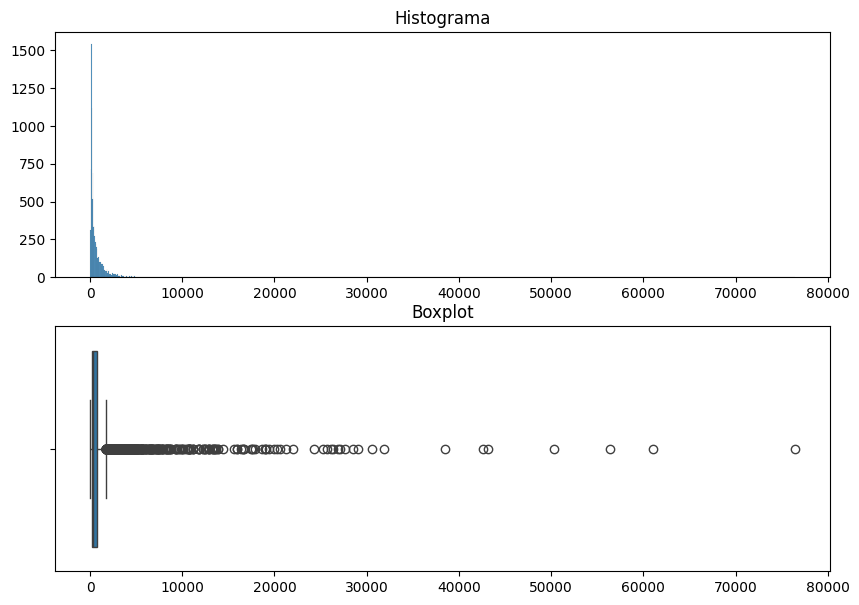

In [106]:
plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
plt.title('Histograma')
sns.histplot(data=df, x='MIN_PAYMENTS')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

plt.subplot(2,1,2)
plt.title('Boxplot')
sns.boxplot(data=df, x='MIN_PAYMENTS')
plt.gca().set_xlabel('')

plt.show()

In [107]:
print(f'MIN_PAYMENTS \n')

print(f'Media: {df.MIN_PAYMENTS.mean():.2f}')
print(f'Mediana: {df.MIN_PAYMENTS.median():.2f}')
print(f'Moda: {df.MIN_PAYMENTS.mode()[0]:.2f}\n')

print(f'Desviacion: {df.MIN_PAYMENTS.std():.2f}')
print(f'Minimo: {df.MIN_PAYMENTS.min():.2f}')
print(f'Maximo: {df.MIN_PAYMENTS.max():.2f}')
print(f'Rango: {df.MIN_PAYMENTS.max() - df.MIN_PAYMENTS.min():.2f}')

MIN_PAYMENTS 

Media: 844.91
Mediana: 312.34
Moda: 312.34

Desviacion: 2332.79
Minimo: 0.02
Maximo: 76406.21
Rango: 76406.19


### Tenure

In [108]:
df_tenure = df['TENURE'].value_counts().sort_index().reset_index(name='Absolute')
df_tenure['Relative'] = df_tenure['Absolute'] / df_tenure['Absolute'].sum() * 100
df_tenure

,TENURE,Absolute,Relative
0,6,204,2.279330
1,7,190,2.122905
2,8,196,2.189944
3,9,175,1.955307
4,10,236,2.636872
5,11,365,4.078212
6,12,7584,84.737430


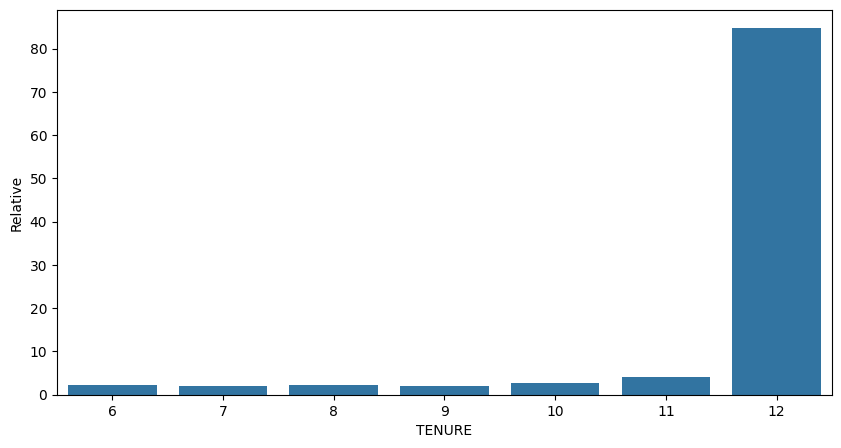

In [109]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_tenure, x='TENURE', y='Relative')

plt.xlabel('TENURE')
plt.ylabel('Relative')
plt.show()

In [110]:
print(f'TENURE \n')

print(f'Media: {df.TENURE.mean():.2f}')
print(f'Mediana: {df.TENURE.median():.2f}')
print(f'Moda: {df.TENURE.mode()[0]:.2f}\n')

print(f'Desviacion: {df.TENURE.std():.2f}')
print(f'Minimo: {df.TENURE.min():.2f}')
print(f'Maximo: {df.TENURE.max():.2f}')
print(f'Rango: {df.TENURE.max() - df.TENURE.min():.2f}')

TENURE 

Media: 11.52
Mediana: 12.00
Moda: 12.00

Desviacion: 1.34
Minimo: 6.00
Maximo: 12.00
Rango: 6.00


## Outliers

### Z-score

#### Balance

In [111]:
media = df['BALANCE'].mean()
desv = df['BALANCE'].std()
umbral = 3

z_scores = (df['BALANCE'] - media) / desv
z_scores.head(3)

0   -0.731948
1    0.786917
2    0.447110
Name: BALANCE, dtype: float64

In [112]:
print(f'BALANCE \n')
print(f'Media: {round(media, 1)}')
print(f'Desviacion: {round(desv, 1)}')
print(f'Limite Min: {round(media - (desv * umbral), 1)}')
print(f'Limite Max: {round(media + (desv * umbral), 1)}')
print(f'Outliers: {z_scores[z_scores > umbral].count()}')

BALANCE 

Media: 1564.5
Desviacion: 2081.5
Limite Min: -4680.1
Limite Max: 7809.1
Outliers: 196


In [113]:
df1 = df[(z_scores.abs() <= umbral)]

print(df1.shape[0])

8754


#### Purchases

In [114]:
media = df1['PURCHASES'].mean()
desv = df1['PURCHASES'].std()
umbral = 3

z_scores = (df1['PURCHASES'] - media) / desv
z_scores.head(3)

0   -0.445503
1   -0.494774
2   -0.095459
Name: PURCHASES, dtype: float64

In [115]:
print(f'PURCHASES \n')
print(f'Media: {round(media, 1)}')
print(f'Desviacion: {round(desv, 1)}')
print(f'Limite Min: {round(media - (desv * umbral), 1)}')
print(f'Limite Max: {round(media + (desv * umbral), 1)}')
print(f'Outliers: {z_scores[z_scores > umbral].count()}')

PURCHASES 

Media: 958.0
Desviacion: 1936.2
Limite Min: -4850.7
Limite Max: 6766.7
Outliers: 134


In [116]:
df1 = df1[(z_scores.abs() <= umbral)]

print(df1.shape[0])

8620


#### Installments

In [117]:
media = df1['INSTALLMENTS'].mean()
desv = df1['INSTALLMENTS'].std()
umbral = 3

z_scores = (df1['INSTALLMENTS'] - media) / desv
z_scores.head(3)

0   -0.420143
1   -0.579589
2   -0.579589
Name: INSTALLMENTS, dtype: float64

In [118]:
print(f'INSTALLMENTS \n')
print(f'Media: {round(media, 1)}')
print(f'Desviacion: {round(desv, 1)}')
print(f'Limite Min: {round(media - (desv * umbral), 1)}')
print(f'Limite Max: {round(media + (desv * umbral), 1)}')
print(f'Outliers: {z_scores[z_scores > umbral].count()}')

INSTALLMENTS 

Media: 346.8
Desviacion: 598.3
Limite Min: -1448.2
Limite Max: 2141.7
Outliers: 197


In [119]:
df1 = df1[(z_scores.abs() <= umbral)]

print(df1.shape[0])

8423


#### Cash Advance

In [120]:
media = df1['CASH_ADVANCE'].mean()
desv = df1['CASH_ADVANCE'].std()
umbral = 3

z_scores = (df1['CASH_ADVANCE'] - media) / desv
z_scores.head(3)

0   -0.491096
1    2.994514
2   -0.491096
Name: CASH_ADVANCE, dtype: float64

In [121]:
print(f'CASH_ADVANCE \n')
print(f'Media: {round(media, 1)}')
print(f'Desviacion: {round(desv, 1)}')
print(f'Limite Min: {round(media - (desv * umbral), 1)}')
print(f'Limite Max: {round(media + (desv * umbral), 1)}')
print(f'Outliers: {z_scores[z_scores > umbral].count()}')

CASH_ADVANCE 

Media: 907.8
Desviacion: 1848.4
Limite Min: -4637.6
Limite Max: 6453.1
Outliers: 185


In [122]:
df1 = df1[(z_scores.abs() <= umbral)]

print(df1.shape[0])

8238


### IQR

#### Credit Limit

In [124]:
Q1 = df1['CREDIT_LIMIT'].quantile(0.25)
Q3 = df1['CREDIT_LIMIT'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers = df1[(df1['CREDIT_LIMIT'] < limite_inferior)
              | (df1['CREDIT_LIMIT'] > limite_superior)].shape[0]

In [20]:
print(f'CREDIT_LIMIT \n')
print(f'Q1: {round(Q1, 1)}')
print(f'Q2: {df.CREDIT_LIMIT.median():.2f}')
print(f'Q3: {round(Q3, 1)}')
print(f'IQR: {round(IQR, 1)}')
print(f'Limite Inferior: {round(limite_inferior, 1)}')
print(f'Limite Superior: {round(limite_superior, 1)}')
print(f'Outliers: {outliers}')

CREDIT_LIMIT 

Q1: 1600.0
Q2: 3000.00
Q3: 6500.0
IQR: 4900.0
Limite Inferior: -5750.0
Limite Superior: 13850.0
Outliers: 248


In [125]:
df1 = df1[(df1['CREDIT_LIMIT'] >= limite_inferior)
        & (df1['CREDIT_LIMIT'] <= limite_superior)]

print(df1.shape[0])

8065


#### Payments

In [126]:
Q1 = df1['PAYMENTS'].quantile(0.25)
Q3 = df1['PAYMENTS'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers = df1[(df1['PAYMENTS'] < limite_inferior)
              | (df1['PAYMENTS'] > limite_superior)].shape[0]

In [127]:
print(f'PAYMENTS \n')
print(f'Q1: {round(Q1, 1)}')
print(f'Q2: {df.CREDIT_LIMIT.median():.2f}')
print(f'Q3: {round(Q3, 1)}')
print(f'IQR: {round(IQR, 1)}')
print(f'Limite Inferior: {round(limite_inferior, 1)}')
print(f'Limite Superior: {round(limite_superior, 1)}')
print(f'Outliers: {outliers}')

PAYMENTS 

Q1: 350.1
Q2: 3000.00
Q3: 1566.9
IQR: 1216.8
Limite Inferior: -1475.2
Limite Superior: 3392.2
Outliers: 667


In [128]:
df1 = df1[(df1['PAYMENTS'] >= limite_inferior)
        & (df1['PAYMENTS'] <= limite_superior)]

print(df1.shape[0])

7398


#### Min Payments

In [129]:
Q1 = df1['MIN_PAYMENTS'].quantile(0.25)
Q3 = df1['MIN_PAYMENTS'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers = df1[(df1['MIN_PAYMENTS'] < limite_inferior)
              | (df1['MIN_PAYMENTS'] > limite_superior)].shape[0]

In [130]:
print(f'MIN_PAYMENTS \n')
print(f'Q1: {round(Q1, 1)}')
print(f'Q2: {df.CREDIT_LIMIT.median():.2f}')
print(f'Q3: {round(Q3, 1)}')
print(f'IQR: {round(IQR, 1)}')
print(f'Limite Inferior: {round(limite_inferior, 1)}')
print(f'Limite Superior: {round(limite_superior, 1)}')
print(f'Outliers: {outliers}')

MIN_PAYMENTS 

Q1: 164.4
Q2: 3000.00
Q3: 644.0
IQR: 479.6
Limite Inferior: -555.1
Limite Superior: 1363.5
Outliers: 717


In [131]:
df1 = df1[(df1['MIN_PAYMENTS'] >= limite_inferior)
        & (df1['MIN_PAYMENTS'] <= limite_superior)]

print(df1.shape[0])

6681


## Scaling

In [231]:
num_cols = ['BALANCE','PURCHASES','INSTALLMENTS','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MIN_PAYMENTS','TENURE']

df_train = df1[num_cols].copy()
df_train.sample(3)

,BALANCE,PURCHASES,INSTALLMENTS,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MIN_PAYMENTS,TENURE
6101,6.840439,74.4,74.4,0.000000,2000.0,225.796349,72.752062,7
7805,1219.044349,0.0,0.0,927.862723,2500.0,259.368165,303.515952,12
8471,839.081567,0.0,0.0,609.463327,1800.0,2719.934613,406.996136,12


In [232]:
df1.describe()

,BALANCE,PURCHASES,INSTALLMENTS,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MIN_PAYMENTS,TENURE
count,6681.000000,6681.000000,6681.000000,6681.000000,6681.000000,6681.000000,6681.000000,6681.000000
mean,932.689600,597.273727,263.265564,522.867979,3505.776346,853.575040,361.874196,11.435414
std,1102.687160,788.088538,399.981797,982.872049,2572.125624,743.370781,304.813296,1.445537
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.019163,6.000000
25%,72.369731,37.750000,0.000000,0.000000,1500.000000,309.300185,157.340797,12.000000
50%,518.894713,300.000000,75.000000,0.000000,2600.000000,607.215424,238.961902,12.000000
75%,1410.753575,830.450000,382.000000,647.542041,5000.000000,1200.321938,481.160634,12.000000
max,7024.269179,6697.570000,2138.190000,6448.247202,12500.000000,3391.718043,1362.306980,12.000000


### Standardization

In [136]:
num_cols = ['BALANCE','PURCHASES','INSTALLMENTS','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MIN_PAYMENTS']

scaler = StandardScaler()
df_train[num_cols] = scaler.fit_transform(df1[num_cols])

In [137]:
print(f'Media: {round(df_train.BALANCE.mean(), 1)}')
print(f'Desviacion: {round(df_train.BALANCE.std(), 1)}')
df_train.head(3)

Media: -0.0
Desviacion: 1.0


,BALANCE,PURCHASES,INSTALLMENTS,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MIN_PAYMENTS,TENURE
0,-0.808802,-0.636872,-0.419714,-0.53202,-0.974277,-0.876846,-0.729565,12
2,1.417062,0.223210,-0.658243,-0.53202,1.553004,-0.311454,0.870797,12
3,0.665679,1.144280,-0.658243,-0.32263,1.553004,-1.148335,-0.162506,12


### Normalization

In [233]:
num_cols = ['BALANCE','PURCHASES','INSTALLMENTS','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MIN_PAYMENTS']

normalizer = MinMaxScaler()
df_train[num_cols] = normalizer.fit_transform(df1[num_cols])

In [234]:
print(f'Minimo: {round(df_train.BALANCE.min(), 1)}')
print(f'Maximo: {round(df_train.BALANCE.max(), 1)}')
df_train.head(3)

Minimo: 0.0
Maximo: 1.0


,BALANCE,PURCHASES,INSTALLMENTS,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MIN_PAYMENTS,TENURE
0,0.005823,0.014244,0.044617,0.000000,0.068826,0.059498,0.102394,12
2,0.355218,0.115440,0.000000,0.000000,0.595142,0.183408,0.460450,12
3,0.237273,0.223813,0.000000,0.031914,0.595142,0.000000,0.229265,12


### Feature Scaling

In [235]:
# Nromalizando da mejor resultado

## K-Means Clustering

In [236]:
df_train.sample(3)

,BALANCE,PURCHASES,INSTALLMENTS,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MIN_PAYMENTS,TENURE
3443,0.037105,0.100526,0.000000,0.074069,0.012146,0.339160,0.319320,12
2188,0.035599,0.359230,0.104645,0.000000,0.797571,0.620730,0.138085,12
2207,0.003483,0.037979,0.118965,0.000000,0.311741,0.060758,0.094280,12


### Elbow Method

In [237]:
dict_km = {}
for k in range(1, 11):
    kms = KMeans(n_init=10,
                 n_clusters=k,
                 random_state=24).fit(df_train)
    dict_km[k] = kms.inertia_

dict_km

{1: 15549.511450492017,
 2: 3384.7524984242627,
 3: 2270.767392184088,
 4: 1931.0700520106507,
 5: 1526.7182615148572,
 6: 1294.1379403146495,
 7: 1176.9481467447279,
 8: 1092.553461117138,
 9: 1002.71581227993,
 10: 920.8171446813285}

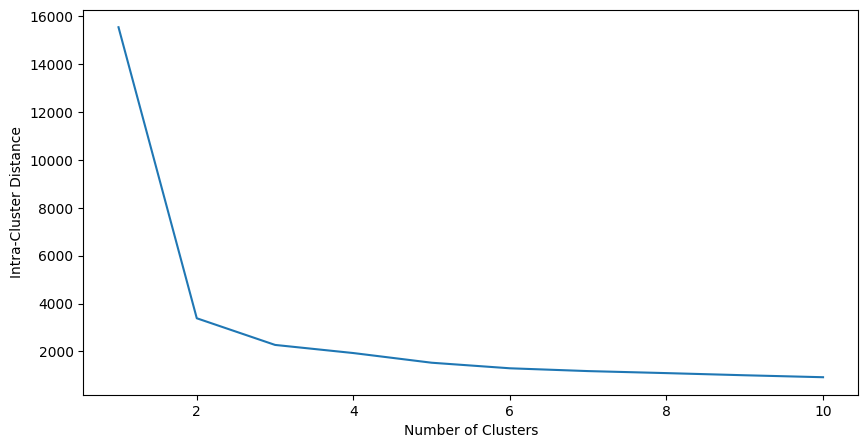

In [238]:
plt.figure(figsize=(10,5))

plt.plot(list(dict_km.keys()), list(dict_km.values()))

plt.xlabel('Number of Clusters')
plt.ylabel('Intra-Cluster Distance')
plt.show()

### Modeling

In [239]:
# Aplicando eliminacion de outliers y stardarizacion de puede definior 4 cluster
# Aplicando eliminacion de outliers y Normalizando de puede definior 3 cluster
# experimentar seleccionando caracteristicas para mejorar las metricas, para este modelado la mejor metrica encontrada es Calinski-Harabasz.
# y aplicando el metodo del codo determinar el numero optimo de clusters (el numero optimo de cluster es: 3)

In [240]:
num_clusters = 3

In [241]:
km_model = KMeans(n_init=10,
                  n_clusters=num_clusters,
                  random_state=24)

km_model.fit(df_train)

KMeans(n_clusters=3, n_init=10, random_state=24)

In [242]:
km_centroids = km_model.cluster_centers_
km_centroids

array([[ 0.13578628,  0.09284826,  0.12911212,  0.07232286,  0.28382145,
         0.26546121,  0.27468825, 11.95161846],
       [ 0.11274215,  0.05782716,  0.07502319,  0.14499338,  0.1822504 ,
         0.13478274,  0.19039563,  6.97924528],
       [ 0.11285693,  0.07546643,  0.09608017,  0.13073901,  0.20510853,
         0.19865009,  0.22836289,  9.58017493]])

In [243]:
km_labels = km_model.labels_
km_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

### Data Clusters

In [244]:
y_km = pd.DataFrame(data=km_labels, columns=['ClusterKM'])
df_clu = pd.concat([df, y_km], axis=1)

df_clu.sample(3)

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MIN_PAYMENTS,TENURE,ClusterKM
1775,C11835,2286.900300,4536.48,1261.48,0.00000,4000.0,5981.014712,1542.926815,12,0.0
8529,C18761,3172.114278,454.13,454.13,4323.52433,4000.0,1746.248986,1091.696320,9,NaN
804,C10833,81.762162,777.04,255.58,0.00000,7500.0,753.811533,162.763716,12,0.0


In [245]:
df_km = df_clu[['ClusterKM']].copy()

df_km = df_km.groupby(['ClusterKM']).size().reset_index(name='Absolute')
df_km['Relative'] = round(df_km['Absolute'] / df_km['Absolute'].sum() * 100, 2)
df_km

,ClusterKM,Absolute,Relative
0,0.0,5808,86.93
1,1.0,530,7.93
2,2.0,343,5.13


## Hierarchical Clustering

### Dendrogram

In [246]:
hc_model = AgglomerativeClustering(distance_threshold=0,
                                   n_clusters=None)

hc_model = hc_model.fit(df_train)

In [247]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

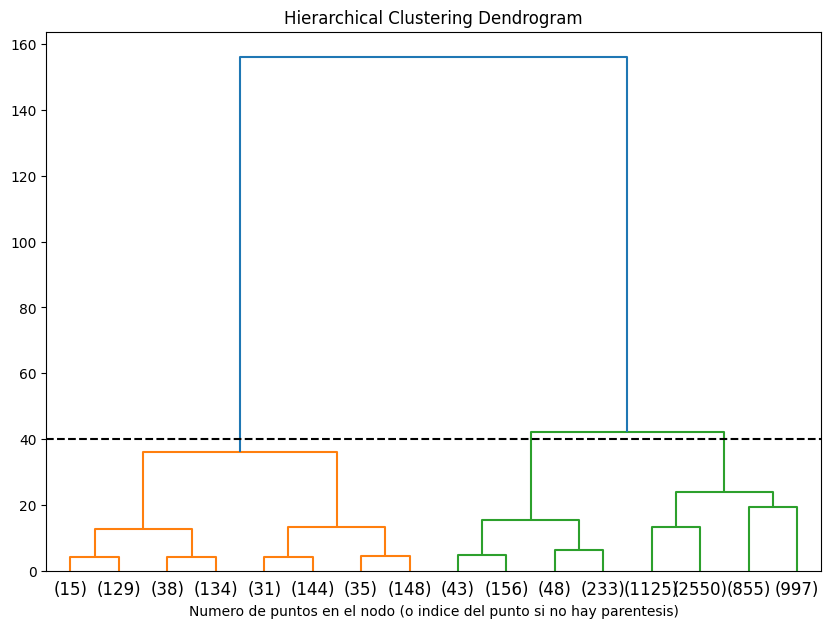

In [248]:
plt.figure(figsize=(10,7))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(hc_model, truncate_mode='level', p=3)
plt.xlabel('Numero de puntos en el nodo (o indice del punto si no hay parentesis)')
plt.axhline(color='black', linestyle='--', y=40)
plt.show()

### Modeling

In [249]:
# Viendo el grafico, se puede apreciar conforme a los datos la definicion de 3 cluster
num_clusters = 3

In [250]:
hc_model = AgglomerativeClustering(n_clusters=num_clusters)

hc_model = hc_model.fit(df_train)

In [251]:
hc_labels = hc_model.fit_predict(df_train)
hc_labels

array([1, 1, 1, ..., 0, 0, 0])

### Data Clusters

In [252]:
y_hc = pd.DataFrame(data=hc_labels, columns=['ClusterHC'])
df_clu = pd.concat([df_clu, y_hc], axis=1)

df_clu.sample(3)

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MIN_PAYMENTS,TENURE,ClusterKM,ClusterHC
7516,C17719,77.383767,2321.87,1109.00,0.000000,1900.0,2071.265301,88.997719,12,NaN,NaN
10,C10011,1293.124939,920.12,920.12,0.000000,1200.0,1083.301007,2172.697765,12,0.0,1.0
7772,C17983,1757.439933,0.00,0.00,2408.007601,2500.0,175.115831,450.616731,6,NaN,NaN


In [253]:
df_hc = df_clu[['ClusterHC']].copy()

df_hc = df_hc.groupby(['ClusterHC']).size().reset_index(name='Absolute')
df_hc['Relative'] = round(df_hc['Absolute'] / df_hc['Absolute'].sum() * 100, 2)
df_hc

,ClusterHC,Absolute,Relative
0,0.0,674,10.09
1,1.0,5527,82.73
2,2.0,480,7.18


## Metrics

### Intrinsic Measures

Estas medidas no requieren etiquetas de verdad (ground truth), aplicables a todos los resultados de aprendizaje no supervisado

#### Silhouette Coefficient

Mide la distancia entre clusters frente a la distancia dentro de los clusters, una puntuación más alta significa clusters mejor definidos.

Silhouette Coefficient tiene un rango de [-1, 1], desde un agrupamiento incorrecto hasta un agrupamiento muy denso.

In [254]:
ss_km = silhouette_score(df_train, km_labels, metric='euclidean')
ss_hc = silhouette_score(df_train, hc_labels, metric='euclidean')

In [255]:
print(f'Silhouette Coefficient')
print('-'*30)
print(f'K-Means Clustering: {round(ss_km, 3)}')
print(f'Hierarchical Clustering: {round(ss_hc, 3)}')

Silhouette Coefficient
------------------------------
K-Means Clustering: 0.695
Hierarchical Clustering: 0.58


#### Calinski-Harabasz Index

Mide la dispersión entre clusters frente a la dispersión dentro de los clusters, una puntuación más alta significa clústeres mejor definidos

In [256]:
ch_km = calinski_harabasz_score(df_train, km_labels)
ch_hc = calinski_harabasz_score(df_train, hc_labels)

In [257]:
print(f'Calinski-Harabasz Index')
print('-'*30)
print(f'K-Means Clustering: {round(ch_km, 3)}')
print(f'Hierarchical Clustering: {round(ch_hc, 3)}')

Calinski-Harabasz Index
------------------------------
K-Means Clustering: 19525.437
Hierarchical Clustering: 17448.878


#### Davies-Bouldin Index

Mide el tamaño de los clusters frente a la distancia media entre clusters, una puntuación más baja significa clústeres mejor definidos

In [258]:
db_km = davies_bouldin_score(df_train, km_labels)
db_hc = davies_bouldin_score(df_train, hc_labels)

In [259]:
print(f'Davies-Bouldin Index')
print('-'*30)
print(f'K-Means Clustering: {round(db_km, 3)}')
print(f'Hierarchical Clustering: {round(db_hc, 3)}')

Davies-Bouldin Index
------------------------------
K-Means Clustering: 0.541
Hierarchical Clustering: 0.709


In [260]:
# analizando los resultados de las tres metricas intrinsecas obtenidas (En base a los resultados la metrica Calinski-Bouldin)
# determinar que metodo de clustering aplicado es el mejor en el caso de uso (El metodo K-Means es el mejor)

## Visualization

### K-Means Clustering

In [261]:
km_med = df_clu.groupby('ClusterKM')[['BALANCE','PURCHASES','INSTALLMENTS',
                                      'CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS',
                                      'MIN_PAYMENTS','TENURE']].median().reset_index()
km_med

,ClusterKM,BALANCE,PURCHASES,INSTALLMENTS,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MIN_PAYMENTS,TENURE
0,0.0,1073.841649,410.24,77.43,0.000000,4000.0,1015.991075,347.027880,12.0
1,1.0,972.340700,397.22,119.14,0.000000,3500.0,937.490751,343.989661,12.0
2,2.0,1138.534442,325.66,0.00,147.205289,4000.0,1019.527645,442.595956,12.0


### Hierarchical Clustering

In [262]:
hc_med = df_clu.groupby('ClusterHC')[['BALANCE','PURCHASES','INSTALLMENTS',
                                      'CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS',
                                      'MIN_PAYMENTS','TENURE']].median().reset_index()
hc_med

,ClusterHC,BALANCE,PURCHASES,INSTALLMENTS,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MIN_PAYMENTS,TENURE
0,0.0,997.767648,397.22,79.00,28.253583,3500.0,955.136728,374.723854,12.0
1,1.0,1075.401912,405.50,72.90,0.000000,4000.0,1014.359244,347.685591,12.0
2,2.0,1085.446129,415.86,97.06,37.032972,4500.0,1033.891569,347.637229,12.0


### Extented Vizualization

In [ ]:
# generar graficos analiticos de los clusters en Python o en Power BI

## Practica y Evaluacion

Enviar el notebook

|Numero|Actividad|Puntaje|
|------|---------|-------|
|N1|Analysis (Graficos y Medidas)|10%|
|N2|Outliers (Z-score y IQR)|10%|
|N3|Scaling (Standard o MinMax)|10%|
|N4|K-Means (Experimentacion)|20%|
|N5|Hierarchical (Experimentacion)|20%|
|N6|Metrics (Analisis Metricas)|10%|
|N7|Visualization (Python o PowerBI)|20%|
